In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!unzip /content/store-sales-time-series-forecasting.zip

Archive:  /content/store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [4]:
train_df = pd.read_csv('/content/train.csv')

In [5]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
train_df.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [9]:
train_df.sample(5)

,id,date,store_nbr,family,sales,onpromotion
1446485,1446485,2015-03-25,44,PREPARED FOODS,382.969,0
693451,693451,2014-01-26,16,"LIQUOR,WINE,BEER",0.000,0
184594,184594,2013-04-14,38,PERSONAL CARE,415.000,0
2160030,2160030,2016-04-30,16,HOME AND KITCHEN I,16.000,0
1526130,1526130,2015-05-09,3,GROCERY I,10674.000,16


<ipython-input-11-c4f57181d7c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

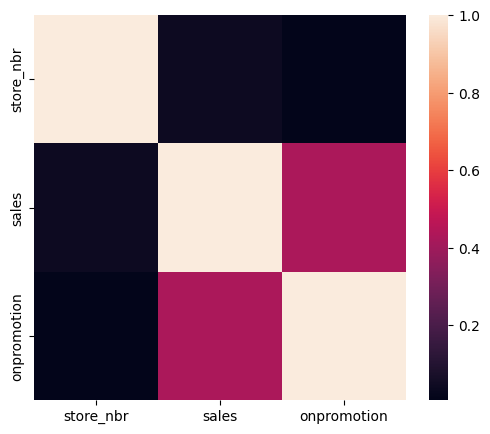

In [11]:
plt.subplots(figsize = (6,5))
sns.heatmap(train_df.corr())

In [12]:
train_df[train_df.family == 'DAIRY'].head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
8,2013-01-01,1,DAIRY,0.0,0
41,2013-01-01,10,DAIRY,0.0,0
74,2013-01-01,11,DAIRY,0.0,0
107,2013-01-01,12,DAIRY,0.0,0
140,2013-01-01,13,DAIRY,0.0,0


<Axes: xlabel='date', ylabel='sales'>

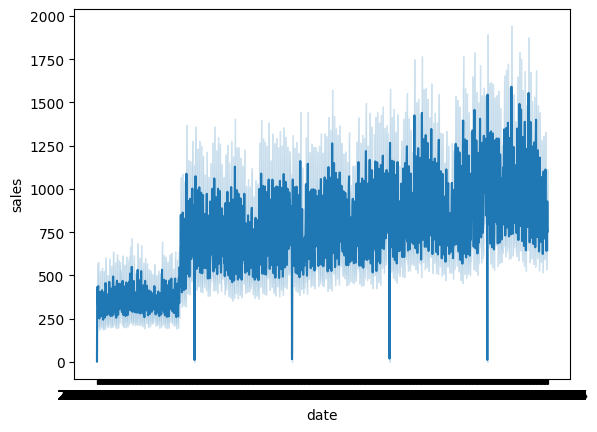

In [ ]:
sns.lineplot(data = train_df[train_df.family == 'DAIRY'], x = 'date', y = 'sales')

<Axes: xlabel='date', ylabel='sales'>

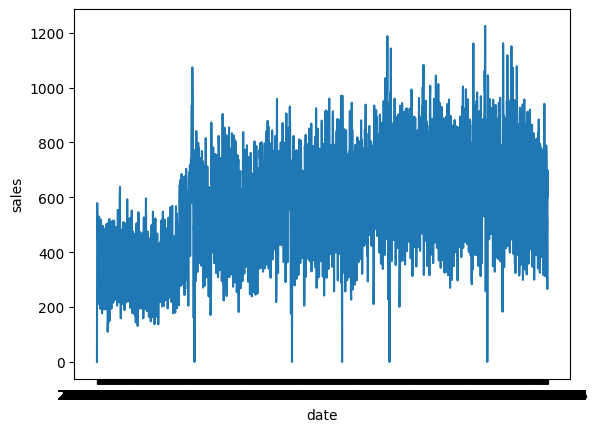

In [ ]:
sns.lineplot(data = train_df[(train_df.family == 'DAIRY') & (train_df.store_nbr == 1)], x = 'date', y = 'sales')

<Axes: xlabel='date', ylabel='sales'>

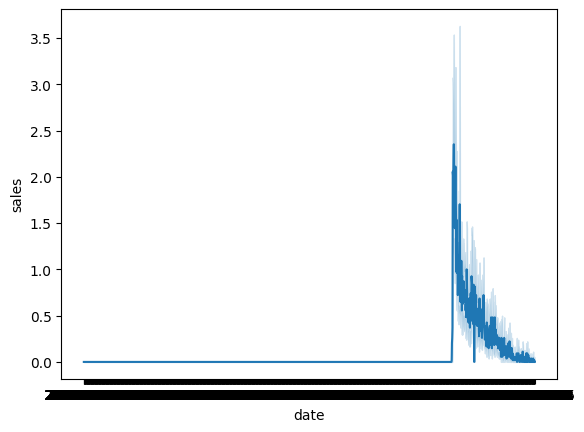

In [ ]:
sns.lineplot(data = train_df[train_df.family == 'BOOKS'], x = 'date', y = 'sales')

In [13]:
'''import statsmodels.api as sm
p = sm.tsa.stattools.adfuller(train_df[(train_df.family == 'DAIRY') & (train_df.store_nbr == 1)].sales)[1]
print(f'Критерий Дики-Фуллера: p-value={p:.4f}')'''

"import statsmodels.api as sm\np = sm.tsa.stattools.adfuller(train_df[(train_df.family == 'DAIRY') & (train_df.store_nbr == 1)].sales)[1]\nprint(f'Критерий Дики-Фуллера: p-value={p:.4f}')"

Features_engineering

In [10]:
stores_df = pd.read_csv('/content/stores.csv')

In [11]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [12]:
len(train)

NameError: name 'train' is not defined

In [13]:
train_df = train_df.merge(stores_df, how = 'left', on='store_nbr')
len(train_df)

3000888

In [14]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [15]:
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dtype: int64

In [16]:
oil_df = pd.read_csv('/content/oil.csv')

In [17]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [18]:
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [19]:
oil_df = oil_df.fillna(method='backfill')

In [20]:
train_df = train_df.merge(oil_df, how = 'left', on = 'date')

In [21]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14


In [22]:
len(train_df)

3000888

In [23]:
holidays_df = pd.read_csv('/content/holidays_events.csv')

In [24]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [25]:
holidays = holidays_df['date'].unique()

In [26]:
train_df['holidays'] = np.where(train_df.date.isin(holidays), 1, 0)

In [27]:
len(train_df)

3000888

In [28]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holidays
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1


In [29]:
train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month
train_df['day'] = pd.DatetimeIndex(train_df['date']).day
train_df = train_df.drop(columns = ['date'])

In [30]:
train_df.type.unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [31]:
train_df = pd.get_dummies(train_df, columns = ['family', 'city', 'state', 'type'])

In [32]:
train_df.head()

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,holidays,year,month,day,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,0,1,0.0,0,13,93.14,1,2013,1,1,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0.0,0,13,93.14,1,2013,1,1,...,0,1,0,0,0,0,0,0,1,0
2,2,1,0.0,0,13,93.14,1,2013,1,1,...,0,1,0,0,0,0,0,0,1,0
3,3,1,0.0,0,13,93.14,1,2013,1,1,...,0,1,0,0,0,0,0,0,1,0
4,4,1,0.0,0,13,93.14,1,2013,1,1,...,0,1,0,0,0,0,0,0,1,0


In [33]:
train_ids = train_df['id']
Y = train_df['sales']
X = train_df.drop(columns = ['sales', 'id'])

In [34]:
X.head()

,store_nbr,onpromotion,cluster,dcoilwtico,holidays,year,month,day,family_AUTOMOTIVE,family_BABY CARE,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,1,0,13,93.14,1,2013,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,13,93.14,1,2013,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,0,13,93.14,1,2013,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,13,93.14,1,2013,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,13,93.14,1,2013,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))

Обучение

In [36]:
#!pip install optuna

In [37]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [57]:
def objective(trial):
  param = { "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
  "eta": trial.suggest_float("eta", 0.01, 0.3, step = 0.02),
  "max_depth": trial.suggest_int("max_depth", 1, 12),
  "subsample": trial.suggest_float("subsample", 0.5, 1, step = 0.05),
  "tree_method": trial.suggest_categorical("tree_method", ["exact", "auto", "approx", "hist"]),
  "eval_metric": "rmse",
  }
  model = XGBRegressor()
  X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size = 0.75)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  y_pred[y_pred<0] = 0
  error = mean_squared_log_error(y_val, y_pred)
  trial.set_user_attr(key="best_model", value=model)
  return error

In [59]:
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_model", value=trial.user_attrs["best_model"])

In [60]:
study = optuna.create_study()
study.optimize(objective, n_trials=3, callbacks=[callback])

[I 2024-01-10 19:13:45,205] A new study created in memory with name: no-name-c50cc0b2-d568-4fbc-9e60-457bd3b783df
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.01, 0.3] and step=0.02, but the range is not divisible by `step`. It will be replaced by [0.01, 0.29].
  warnings.warn(
[I 2024-01-10 19:14:59,922] Trial 0 finished with value: 2.8439750610716557 and parameters: {'booster': 'dart', 'eta': 0.01, 'max_depth': 11, 'subsample': 0.95, 'tree_method': 'auto'}. Best is trial 0 with value: 2.8439750610716557.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.01, 0.3] and step=0.02, but the range is not divisible by `step`. It will be replaced by [0.01, 0.29].
  warnings.warn(
[I 2024-01-10 19:16:20,465] Trial 1 finished with value: 2.874465076721381 and parameters: {'booster': 'dart', 'eta': 0.01, 'max_depth': 10, 'subsample': 0.65, 'tree_method': 'e

In [61]:
trial = study.best_trial

In [62]:
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    booster: dart
    eta: 0.01
    max_depth: 11
    subsample: 0.95
    tree_method: auto


In [64]:
best_model=study.user_attrs["best_model"]

Predictions

In [40]:
test_df = pd.read_csv('/content/test.csv')

In [41]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [42]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [43]:
def preproc(df):
  df = df.merge(stores_df, how = 'left', on='store_nbr')
  df = df.merge(oil_df, how = 'left', on = 'date')
  df['holidays'] = np.where(df.date.isin(holidays), 1, 0)
  df['year'] = pd.DatetimeIndex(df['date']).year
  df['month'] = pd.DatetimeIndex(df['date']).month
  df['day'] = pd.DatetimeIndex(df['date']).day
  df = df.drop(columns = ['date'])
  df = pd.get_dummies(df, columns = ['family', 'city', 'state', 'type'])
  ids = df['id']
  X = df.drop(columns = ['id'])
  X = pd.DataFrame(scaler.transform(X))
  return ids, X

In [44]:
test_ids, X_test = preproc(test_df)

In [65]:
pred = best_model.predict(X_test)

In [66]:
pred = pd.Series(pred)

In [67]:
pred[pred<0] = 0

In [68]:
ans = pd.concat([test_ids, pred], axis = 1)

In [69]:
ans = ans.rename(columns = {0: 'sales'})

In [70]:
ans.to_csv('ans.csv', index = False)